In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
import random
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Input , Dropout , Flatten  , Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG,Image
import tensorflow as tf
print('tensorflow verison', tf.__version__)


tensorflow verison 2.16.1


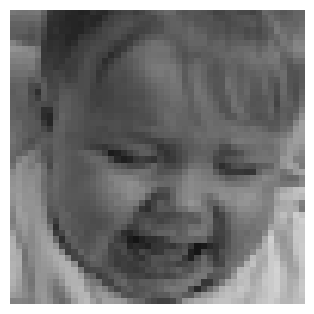

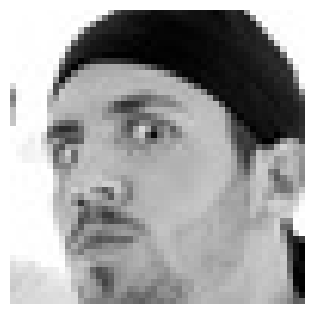

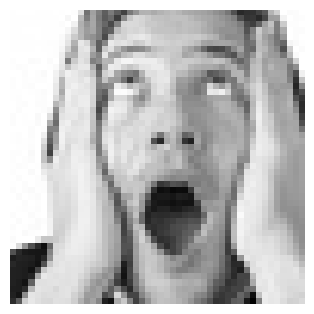

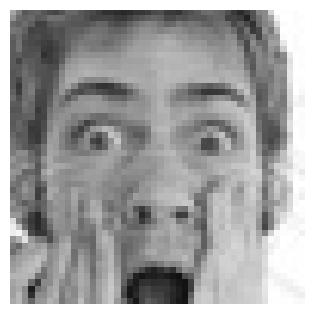

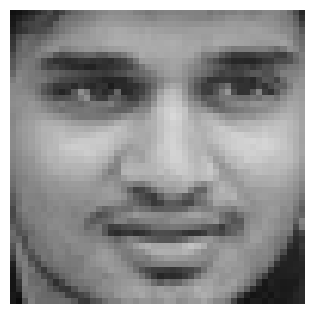

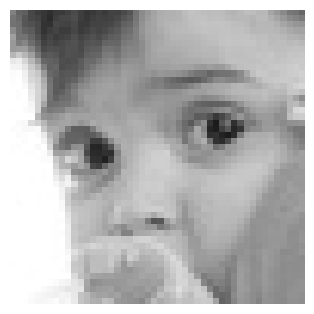

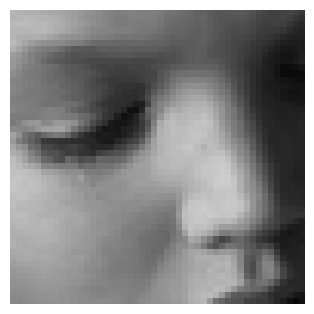

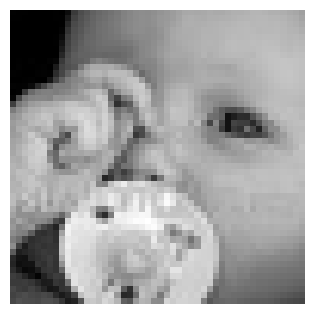

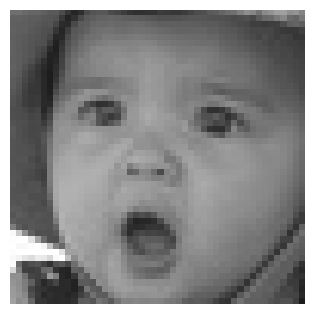

In [2]:
images=glob("train/**/**")
for  i in range(9):
    image =random.choice(images)
    plt.figure(figsize=(13,13))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

In [3]:
img_size=48
batch_size=46
datagen_train=ImageDataGenerator()
datagen_validation=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,class_mode='categorical',shuffle=True)
validation_generator=datagen_train.flow_from_directory("test/",target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,class_mode="categorical",shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    return x


In [5]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x


In [6]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(conv_1,64,(5,5))
    conv_3=Convolution(conv_2,128,(3,3))
    flatten=Flatten()(conv_3)
    dense_1=Dense_f(flatten,256)
    output=Dense(7,activation='softmax')(dense_1)
    model=Model(inputs=[inputs],outputs=[output])
    model.compile(loss=['categorical_crossentropy'],optimizer="adam",metrics=['accuracy'])
    return model

In [7]:
model=model_fer((48,48,1))
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

None


In [8]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint("model.weights.h5",monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]

In [9]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)
print(history)

Epoch 1/15


c:\Users\VIVEK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.3201 - loss: 1.8218
Epoch 1: saving model to model.weights.h5
624/624 ━━━━━━━━━━━━━━━━━━━━ 365s 576ms/step - accuracy: 0.3202 - loss: 1.8216 - val_accuracy: 0.4167 - val_loss: 1.4904
Epoch 2/15
  1/624 ━━━━━━━━━━━━━━━━━━━━ 2:07 205ms/step - accuracy: 0.4783 - loss: 1.3799
Epoch 2: saving model to model.weights.h5
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.4783 - loss: 1.3799 - val_accuracy: 0.5000 - val_loss: 1.3005
Epoch 3/15


c:\Users\VIVEK\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4635 - loss: 1.4032
Epoch 3: saving model to model.weights.h5
624/624 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.4635 - loss: 1.4031 - val_accuracy: 0.4923 - val_loss: 1.3277
Epoch 4/15
  1/624 ━━━━━━━━━━━━━━━━━━━━ 1:37 156ms/step - accuracy: 0.4348 - loss: 1.6245
Epoch 4: saving model to model.weights.h5
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.4348 - loss: 1.6245 - val_accuracy: 1.0000 - val_loss: 0.0544
Epoch 5/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5112 - loss: 1.2851
Epoch 5: saving model to model.weights.h5
624/624 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.5112 - loss: 1.2851 - val_accuracy: 0.4734 - val_loss: 1.3457
Epoch 6/15
  1/624 ━━━━━━━━━━━━━━━━━━━━ 1:35 153ms/step - accuracy: 0.6522 - loss: 1.0985
Epoch 6: saving model to model.weights.h5
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.6522 - loss: 1.0985 - val_accuracy: 1.0000 - val_loss: 0.4861
Epoch 7

In [10]:
model.evaluate(validation_generator)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5504 - loss: 1.1773


[1.152945876121521, 0.5670102834701538]

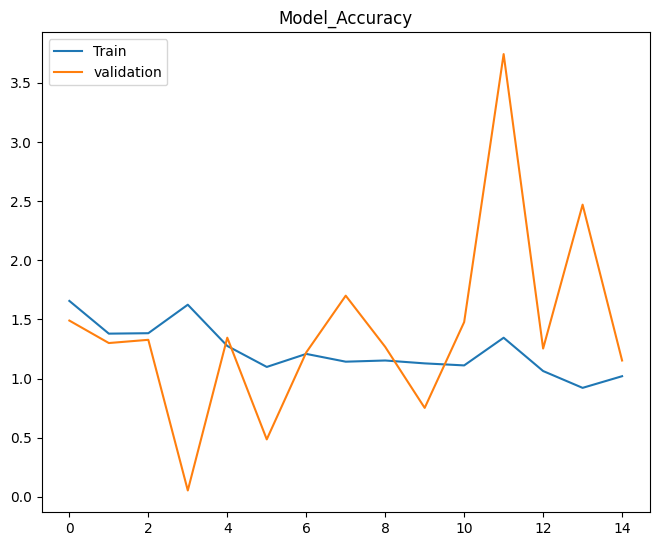

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


In [12]:
model_json=model.to_json()
with open('model_a.json','w') as json_file:
    json_file.write(model_json)